In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
def pre_process_data(filepath,num_classes=10):
    df=pd.read_csv(filepath)
    X=df.iloc[:,1:].values.astype('float32')
    y=df['label'].values
    X/=255.0
    y=to_categorical(y,num_classes=num_classes)
    return X,y

In [26]:
X_train, y_train = pre_process_data('mnist_train.csv')
X_test, y_test = pre_process_data('mnist_test.csv')

In [37]:
model=Sequential([
    Flatten (input_shape=(784,)),
    Dense(512,activation='relu',name='Hidden_layer_1'),
    Dense(256,activation='relu',name='Hidden_layer_2'),
    Dense(10,activation='softmax',name='Output_layer'),

])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_1 (Dense)               │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_2 (Dense)               │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
H=model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    epochs=11,
    batch_size=128,
    verbose=1
)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6165 - loss: 1.5607 - val_accuracy: 0.8758 - val_loss: 0.5136
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8772 - loss: 0.4884 - val_accuracy: 0.9011 - val_loss: 0.3674
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8992 - loss: 0.3701 - val_accuracy: 0.9108 - val_loss: 0.3177
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9105 - loss: 0.3228 - val_accuracy: 0.9203 - val_loss: 0.2888
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9175 - loss: 0.2954 - val_accuracy: 0.9259 - val_loss: 0.2679
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9224 - loss: 0.2746 - val_accuracy: 0.9280 - val_loss: 0.2523
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9287 - loss: 0.2543 - val_accuracy: 0.9345 - val_loss: 0.2386
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9297 - loss: 0.2455 - val_ac

In [43]:
loss,accuracy =model.evaluate(X_test,y_test,verbose=0) 
print("Test loss :",loss)
print(accuracy*100)

Test loss : 0.19890402257442474
94.33000087738037


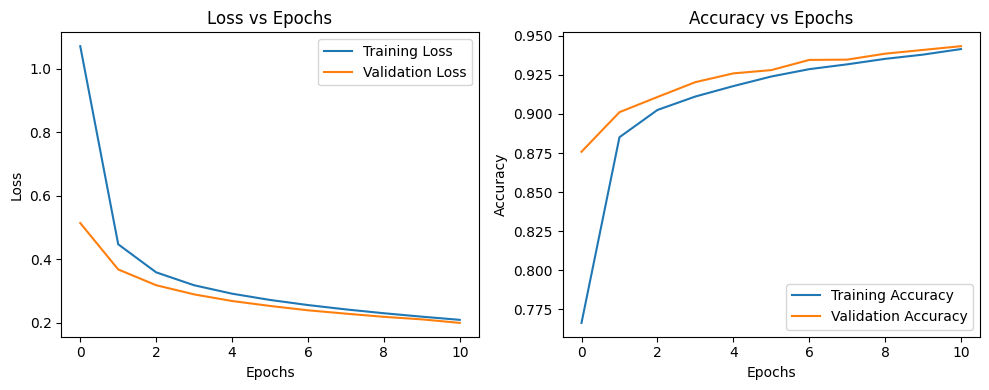

In [45]:
# Step (f) Plot the training loss and accuracy
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()